# **Análisis Exploratorio y Modelado con Random Forest en Datos de Compras en Redes Sociales**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
import graphviz
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score

In [ ]:
# Cargar el dataset
dataset = pd.read_csv('Social_Network_Ads.csv')

**Primeras filas del dataset**

In [ ]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


# Descripción estadística del dataset

In [ ]:
print("\nDescripción estadística del dataset:")
print(dataset.describe())


Descripción estadística del dataset:
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000


**ANALISIS EXPLORATORIO DE DATOS**

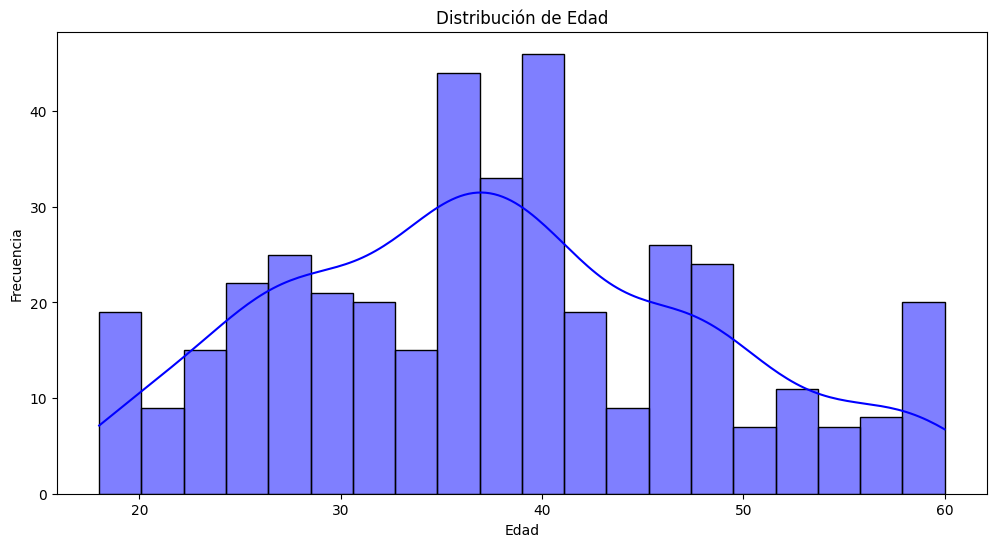

In [ ]:
# --- Análisis Exploratorio de Datos (EDA) --- #
plt.figure(figsize=(12, 6))
sns.histplot(dataset['Age'], bins=20, kde=True, color='blue')
plt.title("Distribución de Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

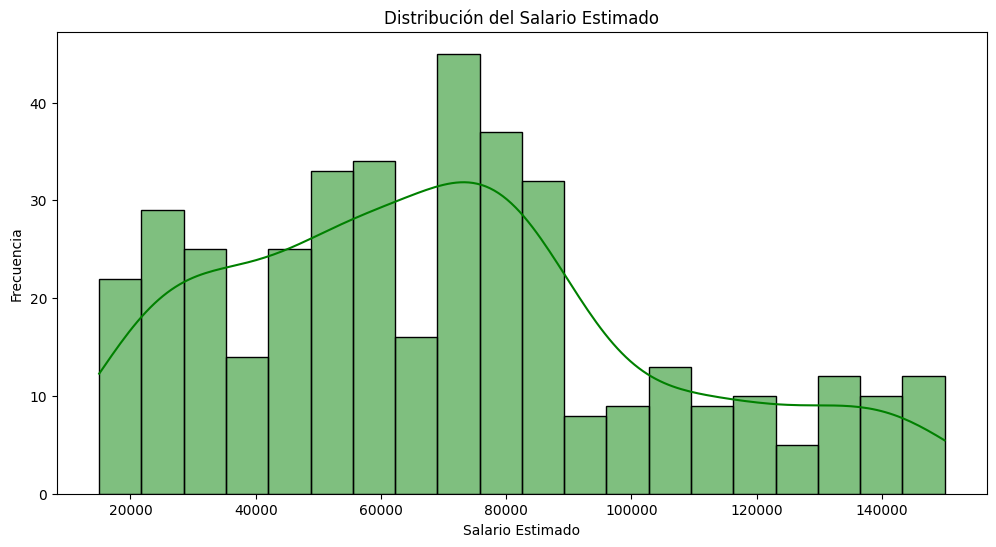

In [ ]:

plt.figure(figsize=(12, 6))
sns.histplot(dataset['EstimatedSalary'], bins=20, kde=True, color='green')
plt.title("Distribución del Salario Estimado")
plt.xlabel("Salario Estimado")
plt.ylabel("Frecuencia")
plt.show()



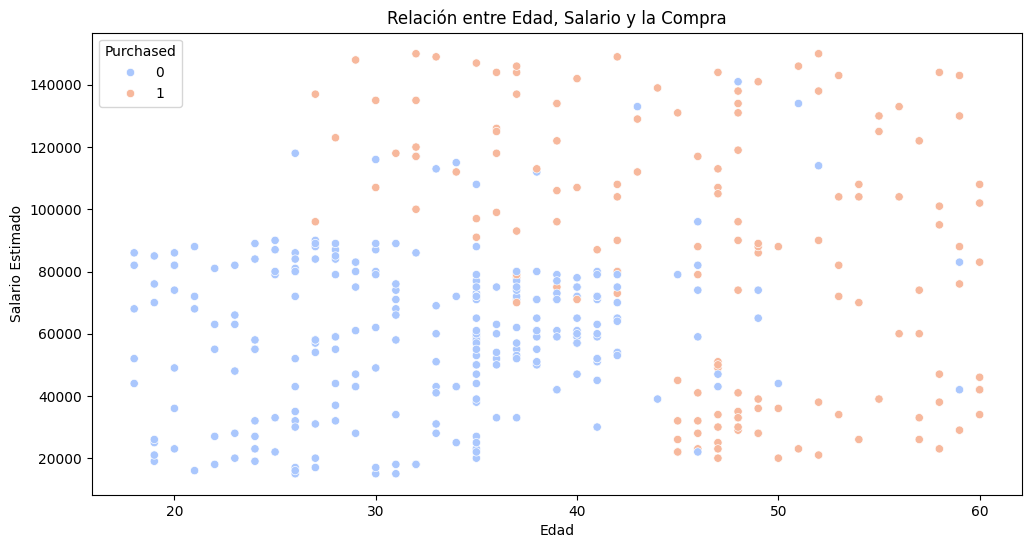

In [ ]:
# Relación entre Edad y Salario Estimado con respecto a la compra
plt.figure(figsize=(12, 6))
sns.scatterplot(x=dataset['Age'], y=dataset['EstimatedSalary'], hue=dataset['Purchased'], palette='coolwarm')
plt.title("Relación entre Edad, Salario y la Compra")
plt.xlabel("Edad")
plt.ylabel("Salario Estimado")
plt.show()

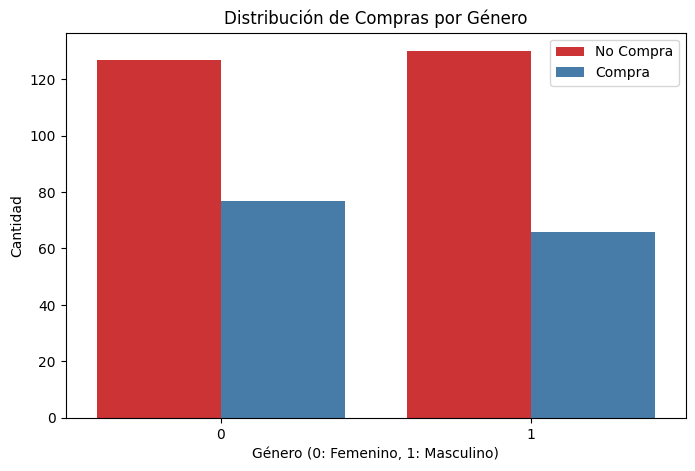

In [ ]:
# Distribución de compras por género
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Purchased', data=dataset, palette='Set1')
plt.title("Distribución de Compras por Género")
plt.xlabel("Género (0: Femenino, 1: Masculino)")
plt.ylabel("Cantidad")
plt.legend(["No Compra", "Compra"])
plt.show()

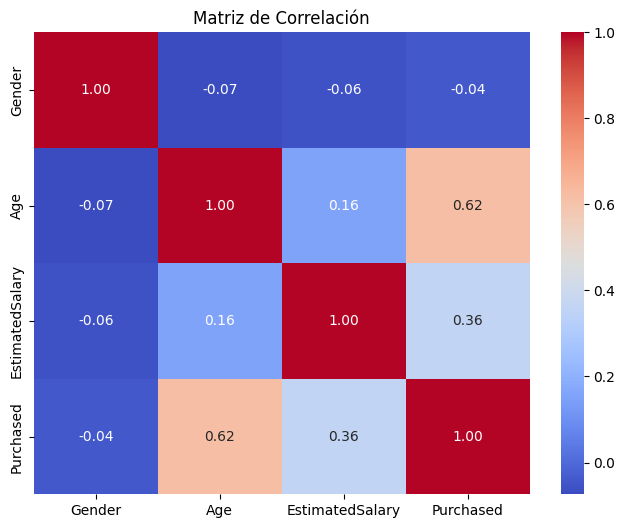

In [ ]:
# Matriz de correlación
plt.figure(figsize=(8, 6))

sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


In [ ]:
# Convertir la variable "Gender" en una variable numérica
labelencoder_gender = LabelEncoder()
dataset['Gender'] = labelencoder_gender.fit_transform(dataset['Gender'])
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19.0,19000.0,0
1,15810944,1,35.0,20000.0,0
2,15668575,0,26.0,43000.0,0
3,15603246,0,27.0,57000.0,0
4,15804002,1,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,0,46.0,41000.0,1
396,15706071,1,51.0,23000.0,1
397,15654296,0,50.0,20000.0,1
398,15755018,1,36.0,33000.0,0


In [ ]:
# Separar características y variable objetivo
X = dataset.iloc[:, [1, 2, 3]].values  # Usamos Gender, Age y Estimated Salary
y = dataset.iloc[:, 4].values          # Variable objetivo: Purchased


In [ ]:
# Dividir el dataset en conjunto de entrenamiento y conjunto de testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# Ajustar el clasificador Random Forest en el Conjunto de Entrenamiento
classifier = RandomForestClassifier(n_estimators=50, criterion="entropy", random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

In [ ]:
# Predicción de los resultados con el Conjunto de Testing
y_pred = classifier.predict(X_test)

**MATRIZ DE CONFUSION**

In [ ]:
# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(cm)


Matriz de Confusión:
[[64  4]
 [ 4 28]]


Esta es una **matriz de confusión** para un modelo de clasificación binaria. La matriz representa la cantidad de predicciones correctas e incorrectas hechas por el modelo en comparación con las etiquetas reales. Se interpreta de la siguiente manera:

\[
\begin{bmatrix}
64 & 4 \\
4 & 28
\end{bmatrix}
\]

Donde:
- **64** → Verdaderos Positivos (VP): Casos correctamente clasificados como la clase positiva.
- **4** → Falsos Negativos (FN): Casos positivos que fueron clasificados incorrectamente como negativos.
- **4** → Falsos Positivos (FP): Casos negativos que fueron clasificados incorrectamente como positivos.
- **28** → Verdaderos Negativos (VN): Casos correctamente clasificados como la clase negativa.

### Métricas de Evaluación:
A partir de esta matriz de confusión, podemos calcular varias métricas de desempeño:

1. **Precisión (Accuracy)**:  
   \[
    (92\%)
   \]
   Indica qué porcentaje de las predicciones totales fueron correctas.

2. **Precisión (Precision o Valor Predictivo Positivo)**:  
   \[
 (94\%)
   \]
   Indica qué proporción de las predicciones positivas fueron realmente positivas.

3. **Sensibilidad (Recall o Tasa de Verdaderos Positivos)**:  
   \[
(94\%)
   \]
   Indica qué proporción de los casos positivos fueron correctamente identificados.

4. **Especificidad (Tasa de Verdaderos Negativos)**:  
   \[
 (87.5\%)
   \]
   Indica qué proporción de los casos negativos fueron correctamente identificados.

5. **F1-Score** (Promedio armónico de precisión y recall):  
   \[0.94
   \]
   Es una medida de equilibrio entre precisión y sensibilidad.

### Conclusión:
El modelo tiene una **alta precisión y sensibilidad**, lo que significa que clasifica correctamente la mayoría de los casos. Sin embargo, aún hay 4 falsos positivos y 4 falsos negativos, lo que podría ser relevante dependiendo del contexto (por ejemplo, en problemas médicos, los falsos negativos pueden ser críticos).

In [ ]:
# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        68
           1       0.88      0.88      0.88        32

    accuracy                           0.92       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



<ipython-input-46-0781c9970221>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='viridis')


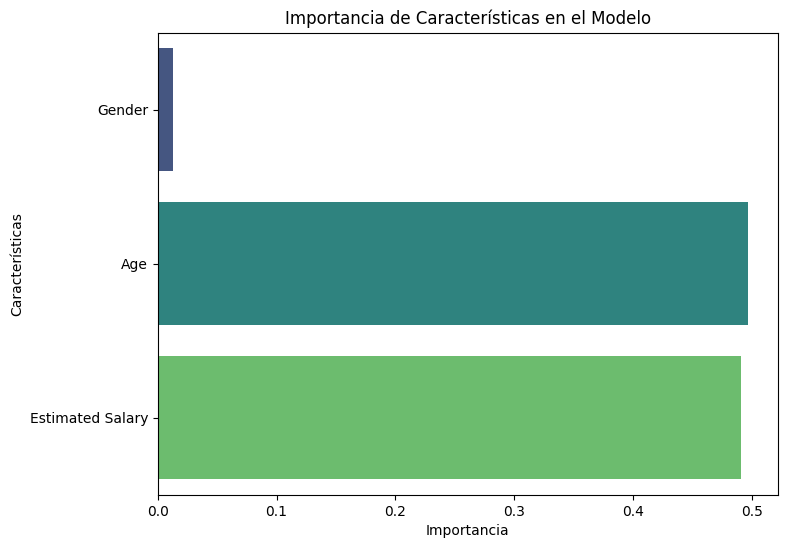

In [ ]:
# Gráfico de Importancia de Características
importances = classifier.feature_importances_
features = ['Gender', 'Age', 'Estimated Salary']
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title("Importancia de Características en el Modelo")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()

In [ ]:
# --- Visualización del árbol de decisión --- #
print("\nVisualización de un Árbol de Decisión en el Random Forest:")
dot_data = export_graphviz(
    classifier.estimators_[0],  # Visualizamos el primer árbol
    out_file=None,
    feature_names=['Gender', 'Age', 'Estimated Salary'],
    class_names=['No', 'Yes'],
    filled=True, rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph.view()


Visualización de un Árbol de Decisión en el Random Forest:


'Source.gv.pdf'

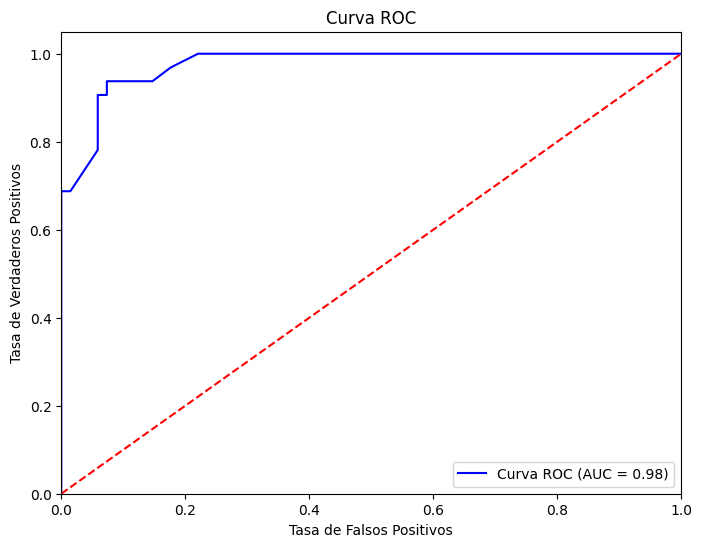

In [ ]:
# Curva ROC
fpr, tpr, _ = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

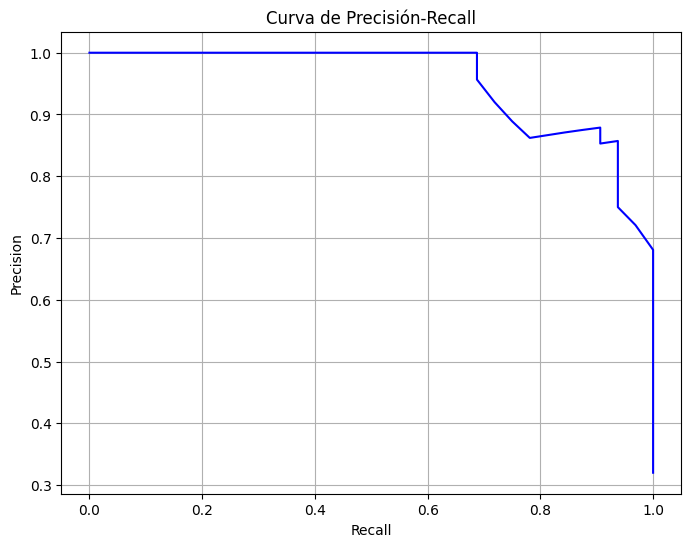

In [ ]:
# Curva de Precisión-Recall
precision, recall, _ = precision_recall_curve(y_test, classifier.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisión-Recall')
plt.grid()
plt.show()

In [ ]:
# Validación Cruzada
scores = cross_val_score(classifier, X, y, cv=5)
print("\nScores de la validación cruzada:", scores)
print("Media de los scores:", round(np.mean(scores), 2))
print("Desviación estándar de los scores:", round(np.std(scores), 2))



Scores de la validación cruzada: [0.8    0.9375 0.8625 0.8375 0.7875]
Media de los scores: 0.84
Desviación estándar de los scores: 0.05


Pruebas de Usuario del Modelo

In [ ]:
# Input para pruebas
gender_input = input("Ingrese el género (Femenino/Masculino): ")
age_input = int(input("Ingrese la edad: "))
salary_input = int(input("Ingrese el sueldo estimado: "))

# Transformar los valores ingresados
gender_encoded = 0 if gender_input.lower() == "femenino" else 1
user_input = np.array([[gender_encoded, age_input, salary_input]])

# Realizar la predicción
prediction = classifier.predict(user_input)
print("Predicción para el Usuario:")
print(f"Género: {gender_input}, Edad: {age_input}, Sueldo Estimado: {salary_input}")
print(f"Resultado: {'Comprará' if prediction[0] == 1 else 'No Comprará'}")

Ingrese el género (Femenino/Masculino): Maculino
Ingrese la edad: 40
Ingrese el sueldo estimado: 100000
Predicción para el Usuario:
Género: Maculino, Edad: 40, Sueldo Estimado: 100000
Resultado: Comprará
